# Data Analysis

In [1]:
#Importing Libraries
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Loading Dataset
df=pd.read_csv('housing.csv')

In [3]:
#viewing sample of data
df.sample(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14100,-117.09,32.76,31.0,1235.0,387.0,816.0,397.0,1.5517,122500.0,NEAR OCEAN
10784,-117.91,33.63,32.0,1901.0,400.0,946.0,418.0,2.7264,311100.0,<1H OCEAN
12366,-116.46,33.79,10.0,6960.0,1487.0,1130.0,661.0,2.1411,136400.0,INLAND
3109,-117.68,35.60,12.0,1678.0,241.0,765.0,281.0,6.0532,102800.0,INLAND
16397,-121.25,38.00,21.0,446.0,73.0,182.0,57.0,2.8958,135000.0,INLAND
10422,-117.60,33.41,29.0,2193.0,389.0,922.0,387.0,4.5476,309200.0,NEAR OCEAN
11973,-117.41,34.00,26.0,2372.0,621.0,1647.0,612.0,1.4719,88600.0,INLAND
7938,-118.11,33.86,33.0,2389.0,410.0,1229.0,393.0,5.3889,234900.0,<1H OCEAN


In [4]:
#Getting Data Set values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Getting categorical data frequency for further analysis
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
#description of dataset
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


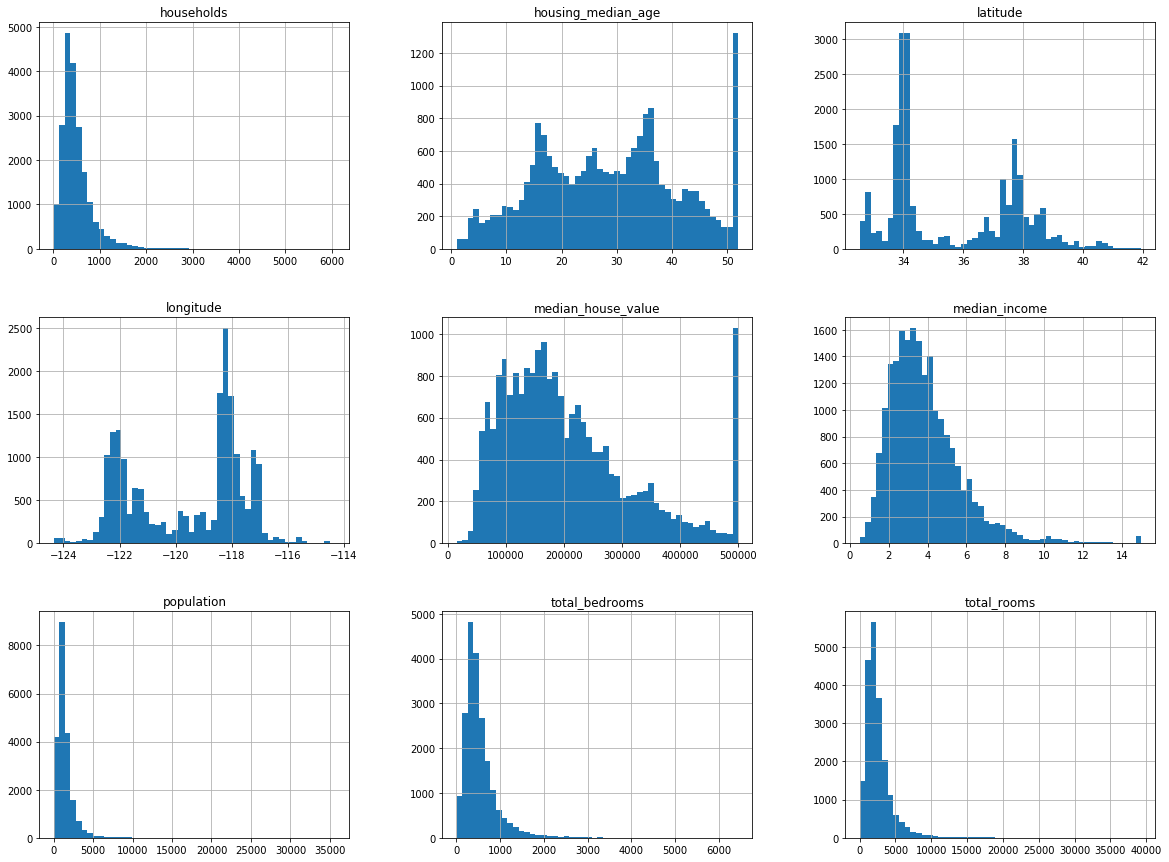

In [7]:
# Visualising data spread of quantitative data of dataset
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#Splitting the data into training and testing data set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=23)

print(len(train_set), "train +", len(test_set), "test")

test_set.head()

16512 train + 4128 test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18552,-122.04,36.96,32.0,1438.0,306.0,802.0,293.0,4.1964,202000.0,NEAR OCEAN
4724,-118.37,34.06,52.0,2239.0,423.0,832.0,411.0,5.0858,470000.0,<1H OCEAN
15423,-117.26,33.20,13.0,3163.0,725.0,1675.0,629.0,2.8214,121900.0,<1H OCEAN
1763,-122.34,37.95,45.0,1128.0,240.0,702.0,270.0,3.6719,134100.0,NEAR BAY
14100,-117.09,32.76,31.0,1235.0,387.0,816.0,397.0,1.5517,122500.0,NEAR OCEAN


''

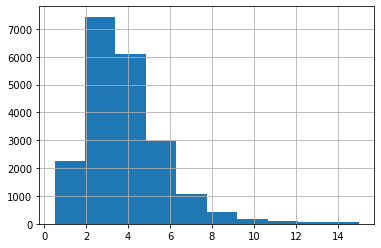

In [10]:
#data spread of median income 
df["median_income"].hist()
;

In [11]:
#taking the cieling values of median income 
df["income_category"] = np.ceil(df["median_income"] / 1.5)

In [12]:
df['income_category'].value_counts()
#Here we can see that income category equal to or above 5 is less so now
# we have to label them above 5 as 5

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_category, dtype: int64

In [13]:
# Labeling above 5 as 5
df["income_category"].where(df["income_category"] < 5, 5.0, inplace=True)

In [14]:
df['income_category'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_category, dtype: int64

''

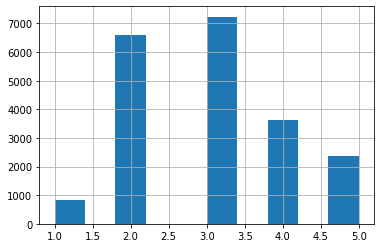

In [15]:
df['income_category'].hist()
;

In [16]:
#spliting the data set into training and testing data with the help of stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=23)
for train_index, test_index in split.split(df, df["income_category"]):
    stratified_train_set = df.loc[train_index]
    stratified_test_set = df.loc[test_index]

In [18]:
stratified_test_set["income_category"].value_counts() / len(stratified_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_category, dtype: float64

In [19]:
df["income_category"].value_counts() / len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In [20]:
# Let’s compare income category proportion in Stratified Sampling and Random Sampling

def income_category_proportions(data):
    return data["income_category"].value_counts() / len(data)

random_train_set, random_test_set = train_test_split(df, test_size=0.2, random_state=23)

compare_proportions = pd.DataFrame({
    "Overall": income_category_proportions(df),
    "Stratified": income_category_proportions(stratified_test_set),
    "Random": income_category_proportions(random_test_set),
}).sort_index()
compare_proportions["Rand. %error"] = 100 * compare_proportions["Random"] / compare_proportions["Overall"] - 100
compare_proportions["Strat. %error"] = 100 * compare_proportions["Stratified"] / compare_proportions["Overall"] - 100
compare_proportions

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.044089,10.705596,-0.243309
2.0,0.318847,0.318798,0.314680,-1.306792,-0.015195
3.0,0.350581,0.350533,0.345203,-1.533997,-0.013820
4.0,0.176308,0.176357,0.178779,1.401484,0.027480
5.0,0.114438,0.114583,0.117248,2.455546,0.127011


In [21]:
for set_ in (stratified_train_set, stratified_test_set):
    set_.drop("income_category", axis=1, inplace=True)

In [22]:
df = stratified_train_set.copy()

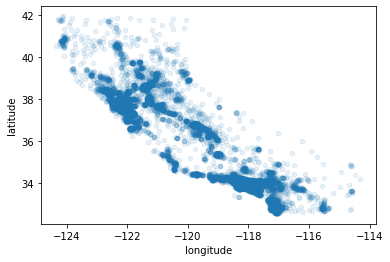

In [23]:
#visualising data for insights
df.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1);

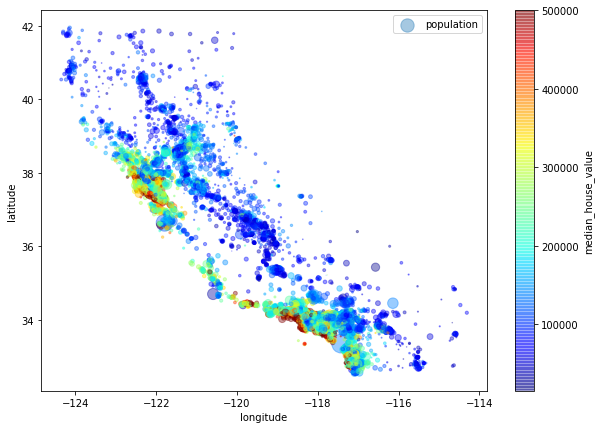

In [24]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend();

In [25]:
#analysing the correlation
correlation=df.corr(method='pearson')
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924362,-0.103363,0.042381,0.066358,0.095684,0.051190,-0.013094,-0.044276
latitude,-0.924362,1.000000,0.004507,-0.032992,-0.062725,-0.104698,-0.066839,-0.080257,-0.145248
housing_median_age,-0.103363,0.004507,1.000000,-0.361285,-0.319467,-0.292781,-0.301221,-0.110249,0.112329
total_rooms,0.042381,-0.032992,-0.361285,1.000000,0.931384,0.857384,0.918350,0.196760,0.128825
total_bedrooms,0.066358,-0.062725,-0.319467,0.931384,1.000000,0.876637,0.978739,-0.007146,0.045901
population,0.095684,-0.104698,-0.292781,0.857384,0.876637,1.000000,0.907357,0.004515,-0.027906
households,0.051190,-0.066839,-0.301221,0.918350,0.978739,0.907357,1.000000,0.012734,0.062675
median_income,-0.013094,-0.080257,-0.110249,0.196760,-0.007146,0.004515,0.012734,1.000000,0.687906
median_house_value,-0.044276,-0.145248,0.112329,0.128825,0.045901,-0.027906,0.062675,0.687906,1.000000


In [26]:
correlation['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687906
total_rooms           0.128825
housing_median_age    0.112329
households            0.062675
total_bedrooms        0.045901
population           -0.027906
longitude            -0.044276
latitude             -0.145248
Name: median_house_value, dtype: float64

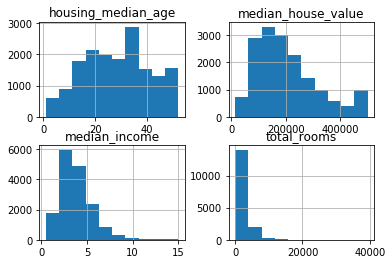

In [27]:
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
df[attributes].hist();

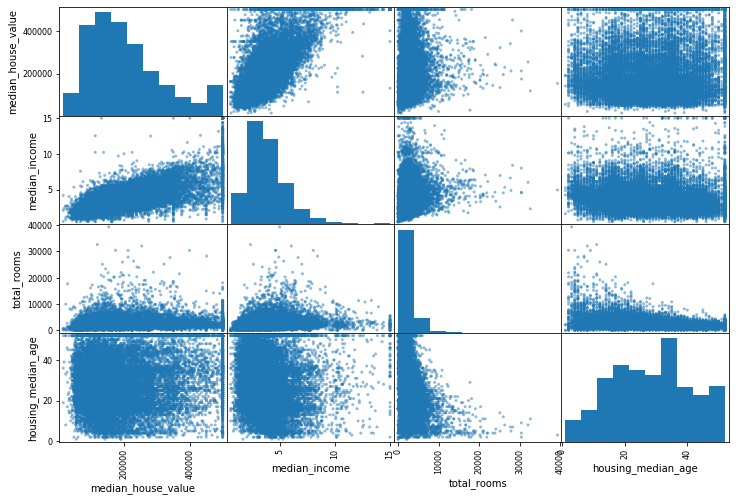

In [28]:
#plotting scatter plot matrix of the given attributes of the data set
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(df[attributes],figsize=(12,8));

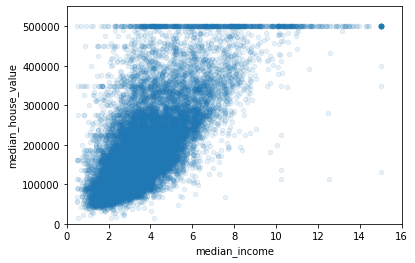

In [29]:
#visualising the difference between median house and median income
df.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000]);

In [30]:
# Experimenting with Attribute Combinations

df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

df.sample(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12671,-121.42,38.49,17.0,13180.0,2444.0,7235.0,2335.0,3.3630,103000.0,INLAND,5.644540,0.185432,3.098501
7753,-118.11,33.91,19.0,3056.0,759.0,1561.0,740.0,3.1369,196900.0,<1H OCEAN,4.129730,0.248364,2.109459
10561,-117.71,33.62,22.0,2520.0,387.0,1338.0,391.0,5.8898,242800.0,<1H OCEAN,6.445013,0.153571,3.421995
10576,-117.70,33.64,15.0,5743.0,773.0,2380.0,773.0,8.1926,326600.0,<1H OCEAN,7.429495,0.134599,3.078913
3789,-118.37,34.17,10.0,1431.0,473.0,1438.0,429.0,2.2756,221400.0,<1H OCEAN,3.335664,0.330538,3.351981
15163,-116.99,32.96,17.0,5509.0,866.0,2748.0,817.0,4.8854,181300.0,<1H OCEAN,6.742962,0.157197,3.363525
15980,-122.46,37.76,28.0,1072.0,165.0,363.0,168.0,6.1636,367700.0,NEAR BAY,6.380952,0.153918,2.160714
7486,-118.21,33.92,35.0,1669.0,445.0,1870.0,412.0,3.0417,117300.0,<1H OCEAN,4.050971,0.266627,4.538835
9316,-122.46,37.98,10.0,1325.0,189.0,427.0,162.0,12.0933,500001.0,NEAR BAY,8.179012,0.142642,2.635802
13213,-117.71,34.04,17.0,4098.0,733.0,1859.0,713.0,2.9811,231800.0,INLAND,5.747546,0.178868,2.607293


In [31]:
#getting the correlation in the data set
correlation = df.corr()
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924362,-0.103363,0.042381,0.066358,0.095684,0.051190,-0.013094,-0.044276,-0.027543,0.088883,0.002596
latitude,-0.924362,1.000000,0.004507,-0.032992,-0.062725,-0.104698,-0.066839,-0.080257,-0.145248,0.109474,-0.111227,0.004362
housing_median_age,-0.103363,0.004507,1.000000,-0.361285,-0.319467,-0.292781,-0.301221,-0.110249,0.112329,-0.168892,0.137857,0.009565
total_rooms,0.042381,-0.032992,-0.361285,1.000000,0.931384,0.857384,0.918350,0.196760,0.128825,0.147890,-0.186273,-0.022150
total_bedrooms,0.066358,-0.062725,-0.319467,0.931384,1.000000,0.876637,0.978739,-0.007146,0.045901,0.008238,0.084597,-0.025714
population,0.095684,-0.104698,-0.292781,0.857384,0.876637,1.000000,0.907357,0.004515,-0.027906,-0.073810,0.033413,0.061166
households,0.051190,-0.066839,-0.301221,0.918350,0.978739,0.907357,1.000000,0.012734,0.062675,-0.082464,0.065297,-0.024585
median_income,-0.013094,-0.080257,-0.110249,0.196760,-0.007146,0.004515,0.012734,1.000000,0.687906,0.357407,-0.619538,0.020557
median_house_value,-0.044276,-0.145248,0.112329,0.128825,0.045901,-0.027906,0.062675,0.687906,1.000000,0.157944,-0.257179,-0.028574
rooms_per_household,-0.027543,0.109474,-0.168892,0.147890,0.008238,-0.073810,-0.082464,0.357407,0.157944,1.000000,-0.448012,-0.011217


In [32]:
correlation = df.corr()
correlation["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687906
rooms_per_household         0.157944
total_rooms                 0.128825
housing_median_age          0.112329
households                  0.062675
total_bedrooms              0.045901
population                 -0.027906
population_per_household   -0.028574
longitude                  -0.044276
latitude                   -0.145248
bedrooms_per_room          -0.257179
Name: median_house_value, dtype: float64

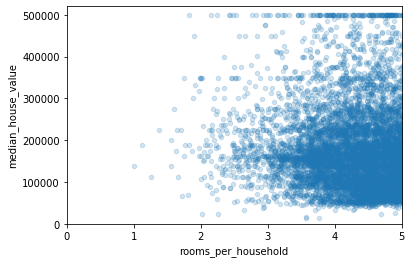

In [33]:
df.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show();

In [34]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16346.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16346.000000,16512.000000
mean,-119.555658,35.620702,28.611192,2640.830971,538.757066,1427.496185,499.896681,3.870271,206632.585756,5.430340,0.212919,3.060308
std,2.004172,2.135022,12.609988,2206.867743,425.986001,1152.808992,385.973476,1.897172,115180.535370,2.318083,0.057565,10.785931
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000,0.100000,0.692308
25%,-121.780000,33.930000,18.000000,1443.000000,296.000000,785.000000,279.000000,2.562500,119600.000000,4.441091,0.175344,2.429528
50%,-118.480000,34.250000,29.000000,2121.000000,434.000000,1163.000000,409.000000,3.539200,179600.000000,5.230373,0.203081,2.821392
75%,-118.000000,37.710000,37.000000,3153.000000,647.000000,1725.000000,605.000000,4.740575,264600.000000,6.057549,0.239864,3.284236
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,132.533333,1.000000,1243.333333


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9438 to 15377
Data columns (total 13 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16346 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
median_house_value          16512 non-null float64
ocean_proximity             16512 non-null object
rooms_per_household         16512 non-null float64
bedrooms_per_room           16346 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


## Machine Learning

In [36]:
# Let’s revert to a clean training set

df = stratified_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = stratified_train_set["median_house_value"].copy()

# Note drop() creates a copy of the data and does not affect strat_train_set

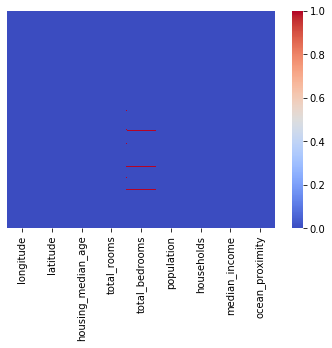

In [37]:
#visualizing the null values in the data set
sns.heatmap(df.isnull(),yticklabels=False,cmap='coolwarm');

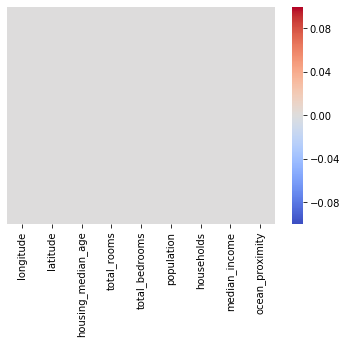

In [49]:
# fillna() - sets the missing values
# Let’s fill the missing values with the median

median = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(median, inplace=True)

#Now there is no null values in the data set
sns.heatmap(df.isnull(),yticklabels=False,cmap='coolwarm');

In [41]:
# Let's use Scikit-Learn Imputer class to fill missing values
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

In [43]:
# Remove the text attribute because median can only be calculated on numerical attributes
housing_number = df.drop('ocean_proximity', axis=1)

In [44]:
imputer.fit(housing_number)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [51]:
imputer.statistics_

X = imputer.transform(housing_number)
X

array([[-1.1998e+02,  3.7430e+01,  1.2000e+01, ...,  1.2360e+03,
         4.8900e+02,  2.5551e+00],
       [-1.1764e+02,  3.3620e+01,  1.6000e+01, ...,  1.2020e+03,
         7.3400e+02,  3.4115e+00],
       [-1.1906e+02,  3.6080e+01,  1.9000e+01, ...,  1.3010e+03,
         4.1900e+02,  4.1856e+00],
       ...,
       [-1.2212e+02,  3.8000e+01,  2.0000e+01, ...,  3.2210e+03,
         1.3340e+03,  4.2042e+00],
       [-1.2223e+02,  3.7780e+01,  4.4000e+01, ...,  2.8130e+03,
         7.5100e+02,  1.6009e+00],
       [-1.1724e+02,  3.3370e+01,  1.4000e+01, ...,  2.4360e+03,
         7.7900e+02,  4.5391e+00]])

In [52]:
df_training=pd.DataFrame(X,columns=housing_number.columns)
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [58]:
housing_category=df['ocean_proximity']
housing_category.head(8)

9438         INLAND
10383     <1H OCEAN
20021        INLAND
17005    NEAR OCEAN
13029        INLAND
15874      NEAR BAY
14124    NEAR OCEAN
17903     <1H OCEAN
Name: ocean_proximity, dtype: object

In [57]:
#converting ocean_proximity into factors
housing_category_encoded, housing_categories = housing_category.factorize()
housing_category_encoded[:8]

array([0, 1, 0, 2, 0, 3, 2, 1], dtype=int64)

In [59]:
housing_categories
'''
0->INLAND
1-><1H OCEAN
....etc
'''

Index(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [60]:
# We can convert each categorical value to a one-hot vector using a `OneHotEncoder`
# Note that fit_transform() expects a 2D array
# but housing_category_encoded is a 1D array, so we need to reshape it

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_category_1hot = encoder.fit_transform(housing_category_encoded.reshape(-1,1))
housing_category_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [61]:
# The OneHotEncoder returns a sparse array by default, but we can convert it to a dense array if needed

housing_category_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [62]:
# Definition of the CategoricalEncoder class, copied from PR #9151.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [63]:
# The CategoricalEncoder expects a 2D array containing one or more categorical input features. 
# We need to reshape `housing_category` to a 2D array:

category_encoder = CategoricalEncoder(encoding="onehot-dense")
housing_category_reshaped = housing_category.values.reshape(-1, 1)
housing_category_1hot = category_encoder.fit_transform(housing_category_reshaped)
housing_category_1hot

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [64]:
category_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
# creating a custom transformer to add extra attributes:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attribute_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attribute_adder.transform(df.values)
housing_extra_attributes = pd.DataFrame(housing_extra_attributes, columns=list(df.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attributes.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-119.98,37.43,12,2776,592,1236,489,2.5551,INLAND,5.67689,2.52761
1,-117.64,33.62,16,3970,771,1202,734,3.4115,<1H OCEAN,5.40872,1.6376
2,-119.06,36.08,19,2554,443,1301,419,4.1856,INLAND,6.09547,3.10501
3,-122.29,37.54,43,2268,438,1151,449,4.9091,NEAR OCEAN,5.05122,2.56347
4,-121.19,38.67,16,1754,284,773,277,4.817,INLAND,6.33213,2.79061


In [66]:
# building a pipeline for preprocessing the numerical attributes:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

number_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attributes_adder', CombinedAttributesAdder()),
        ('standard_scaler', StandardScaler()),
    ])

housing_number_training = number_pipeline.fit_transform(housing_number)

In [67]:
housing_number_training

array([[-0.21173554,  0.84746317, -1.31734421, ...,  0.10636351,
        -0.04938996, -0.00771192],
       [ 0.955864  , -0.93711545, -1.00012574, ..., -0.00932709,
        -0.13190784, -0.29606274],
       [ 0.24732069,  0.21513216, -0.76221189, ...,  0.28693793,
         0.00414478, -0.6101943 ],
       ...,
       [-1.27954025,  1.11444738, -0.68290727, ..., -0.08151825,
        -0.05987288, -0.1962466 ],
       [-1.33442741,  1.01140084,  1.22040354, ..., -0.99848209,
         0.06354437,  2.10092868],
       [ 1.15545367, -1.05421379, -1.15873498, ...,  0.25295307,
         0.00619141, -0.67470679]])

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

# Creating a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [74]:
#joining all these components into a big pipeline that will preprocess both the numerical and the categorical features
number_attributes = list(housing_number)
category_attributes = ["ocean_proximity"]

number_pipeline = Pipeline([
        ('selector', DataFrameSelector(number_attributes)),
        ('imputer', Imputer(strategy="median")),
        ('attributes_adder', CombinedAttributesAdder()),
        ('standard_scaler', StandardScaler()),
    ])

category_pipeline = Pipeline([
        ('selector', DataFrameSelector(category_attributes)),
        ('category_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [75]:
number_pipeline.fit_transform(df)


array([[-0.21173554,  0.84746317, -1.31734421, ...,  0.10636351,
        -0.04938996, -0.00771192],
       [ 0.955864  , -0.93711545, -1.00012574, ..., -0.00932709,
        -0.13190784, -0.29606274],
       [ 0.24732069,  0.21513216, -0.76221189, ...,  0.28693793,
         0.00414478, -0.6101943 ],
       ...,
       [-1.27954025,  1.11444738, -0.68290727, ..., -0.08151825,
        -0.05987288, -0.1962466 ],
       [-1.33442741,  1.01140084,  1.22040354, ..., -0.99848209,
         0.06354437,  2.10092868],
       [ 1.15545367, -1.05421379, -1.15873498, ...,  0.25295307,
         0.00619141, -0.67470679]])

In [76]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("number_pipeline", number_pipeline),
        ("category_pipeline", category_pipeline),
    ])

In [77]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9438,-119.98,37.43,12.0,2776.0,592.0,1236.0,489.0,2.5551,INLAND
10383,-117.64,33.62,16.0,3970.0,771.0,1202.0,734.0,3.4115,<1H OCEAN
20021,-119.06,36.08,19.0,2554.0,443.0,1301.0,419.0,4.1856,INLAND
17005,-122.29,37.54,43.0,2268.0,438.0,1151.0,449.0,4.9091,NEAR OCEAN
13029,-121.19,38.67,16.0,1754.0,284.0,773.0,277.0,4.8170,INLAND


In [79]:
housing_prepared = full_pipeline.fit_transform(df)
print(housing_prepared[0])

[-0.21173554  0.84746317 -1.31734421  0.06125112  0.12807035 -0.1661177
 -0.02823254 -0.69324818  0.10636351 -0.04938996 -0.00771192  0.
  1.          0.          0.          0.        ]


In [80]:
# Training a Linear Regression model

from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# trying the full pipeline on a few training instances

some_data = df.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", linear_regression.predict(some_data_prepared))

Predictions: [ 83980.14538056 223271.63402105 148117.13786527 303593.73862853
 161579.68770252]


In [82]:
#comparing by Printing the actual values

print("Labels:", list(some_labels))

Labels: [105000.0, 184800.0, 72100.0, 293200.0, 147000.0]


In [83]:
# Calculation the RMSE in Linear Regression Model

from sklearn.metrics import mean_squared_error

housing_predictions = linear_regression.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68305.63765638863

In [84]:
# Training a model using Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=23)
tree_regressor.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=23, splitter='best')

In [85]:
# Calculation RMSE in Decision Tree model

housing_predictions = tree_regressor.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [86]:
# Performing K-fold cross-validation
# Randomly splits the training set into 10 distinct subsets called folds
# Then it trains and evaluates the Decision Tree model 10 times By
# Picking a different fold for evaluation every time and training on the other 9 folds
# The result is an array containing the 10 evaluation scores

from sklearn.model_selection import cross_val_score

tree_regressor = DecisionTreeRegressor(random_state=23)
scores = cross_val_score(tree_regressor, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [87]:
#  score of cross-validation of DecisionTreeRegressor

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [68043.60004577 70163.50991196 71999.88433124 71444.25759365
 70647.91575072 68639.85730214 71519.17324419 69691.47793635
 70602.27610664 70922.24033997]
Mean: 70367.4192562635
Standard deviation: 1203.154372894168


In [90]:
#  computating the same score for Linear Regression

linear_scores = cross_val_score(linear_regression, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-linear_scores)
display_scores(lin_rmse_scores)

Scores: [69508.68301295 68196.04330207 69978.107319   67739.06881159
 66517.4492049  69578.2697234  71012.65710515 67719.98976243
 68989.30965735 67054.61597146]
Mean: 68629.41938703108
Standard deviation: 1343.4935324913467


In [91]:
# Let's train one more model using Random Forests

from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(random_state=23)
forest_regressor.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=23, verbose=0,
                      warm_start=False)

In [92]:
# Calculate RMSE in Random Forest model

housing_predictions = forest_regressor.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22086.958525340102

In [93]:
# Cross Validation in Random Forest model

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_regressor, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49598.10135709 53058.32767089 53236.73307167 51656.82530799
 52410.09269557 53105.2269546  53102.60361582 54156.12968145
 52430.67979684 51303.25492237]
Mean: 52405.79750742922
Standard deviation: 1217.1691462904691


In [95]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

parameter_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_regressor = RandomForestRegressor(random_state=23)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_regressor, parameter_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=23,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [97]:
# The best hyperparameter combinations

grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [98]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=23, verbose=0,
                      warm_start=False)

In [99]:
# Let's look at the score of each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63692.68990770813 {'max_features': 2, 'n_estimators': 3}
55125.59409908554 {'max_features': 2, 'n_estimators': 10}
52242.428308670365 {'max_features': 2, 'n_estimators': 30}
60274.8918395177 {'max_features': 4, 'n_estimators': 3}
52456.48148052147 {'max_features': 4, 'n_estimators': 10}
49892.42376323775 {'max_features': 4, 'n_estimators': 30}
58837.527665798436 {'max_features': 6, 'n_estimators': 3}
51822.9581886837 {'max_features': 6, 'n_estimators': 10}
49469.64951393091 {'max_features': 6, 'n_estimators': 30}
57968.79020963674 {'max_features': 8, 'n_estimators': 3}
51406.65441066612 {'max_features': 8, 'n_estimators': 10}
49748.37069644876 {'max_features': 8, 'n_estimators': 30}
62464.5336695055 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53999.269102370425 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59370.89662435153 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51902.40729743697 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [104]:
# RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_regressor = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(forest_regressor, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=23)
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [106]:
#  importannt score of each attribute in GridSearchCV

feature_importances = grid_search.best_estimator_.feature_importances_
extra_attributes = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
category_encoder = category_pipeline.named_steps["category_encoder"]
category_one_hot_attributes = list(category_encoder.categories_[0])
attributes = number_attributes + extra_attributes + category_one_hot_attributes
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3266007041125453, 'median_income'),
 (0.13333897759565508, 'INLAND'),
 (0.10873270936270187, 'pop_per_hhold'),
 (0.08370281380809133, 'bedrooms_per_room'),
 (0.08268577434141301, 'longitude'),
 (0.074463015016009, 'latitude'),
 (0.0611547962131179, 'rooms_per_hhold'),
 (0.04048413186677848, 'housing_median_age'),
 (0.017158091021773247, 'population'),
 (0.01678358817138279, 'total_rooms'),
 (0.01668518579000314, 'total_bedrooms'),
 (0.0157542024889188, 'households'),
 (0.01254946708574375, '<1H OCEAN'),
 (0.006265313912238046, 'NEAR OCEAN'),
 (0.003219751273213345, 'NEAR BAY'),
 (0.00042147794041488867, 'ISLAND')]

In [107]:
# Evaluation model on the Test Set

final_model = grid_search.best_estimator_

X_test = stratified_test_set.drop("median_house_value", axis=1)
y_test = stratified_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [108]:
final_rmse


49885.320105537365